In [1]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle5 as pickle

In [3]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [4]:
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

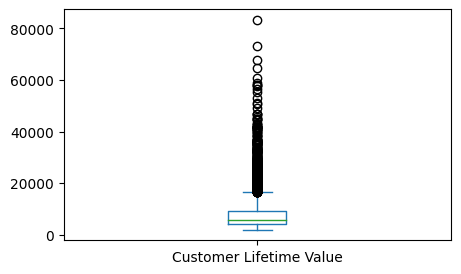

In [5]:
df['Customer Lifetime Value'].plot.box(figsize=(5,3))
plt.show()

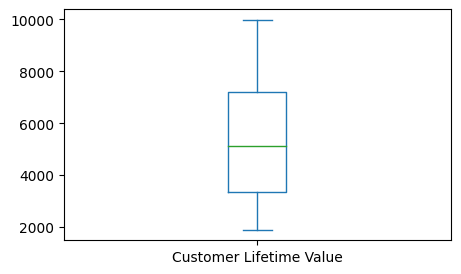

In [6]:
df = df.loc[df['Customer Lifetime Value'] < 10000].reset_index()

df['Customer Lifetime Value'].plot.box(figsize=(5,3))
plt.show()

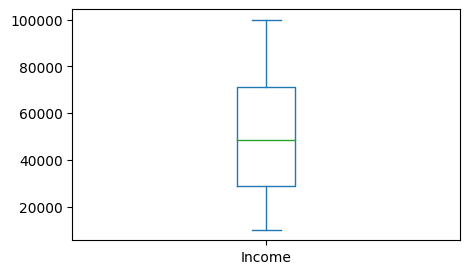

In [7]:
df = df.loc[df['Income'] > 0.0].reset_index()

df['Income'].plot.box(figsize=(5,3))
plt.show()

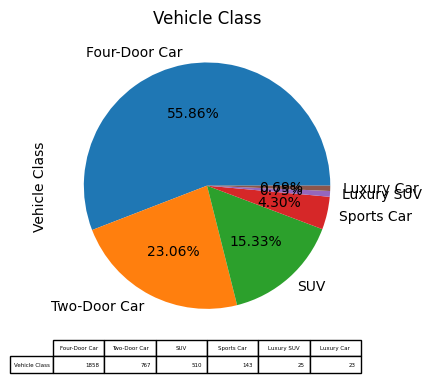

In [8]:
vehicle_class = df['Vehicle Class'].value_counts()

vehicle_class.plot.pie(
    figsize=(4,4),
    title='Vehicle Class',
    table=True,
    autopct='%1.2f%%'
)

plt.show()

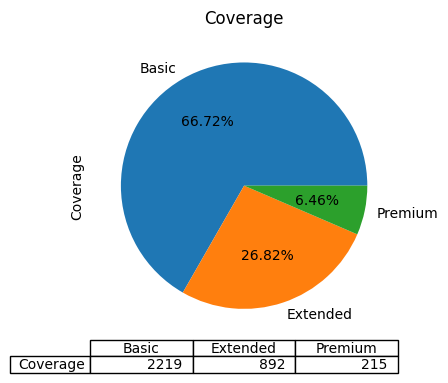

In [9]:
coverage = df['Coverage'].value_counts()

coverage.plot.pie(
    figsize=(4,4),
    title='Coverage',
    table=True,
    autopct='%1.2f%%'
)

plt.show()

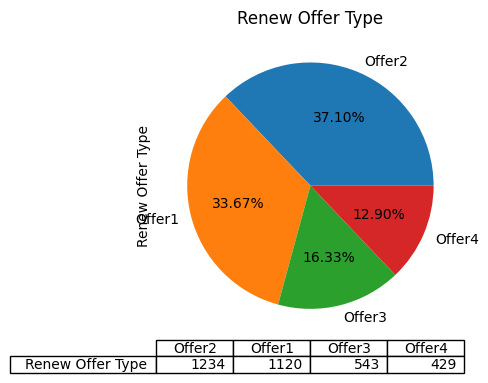

In [10]:
renew_over_type = df['Renew Offer Type'].value_counts()

renew_over_type.plot.pie(
    figsize=(4,4),
    title='Renew Offer Type',
    table=True,
    autopct='%1.2f%%'
)

plt.show()

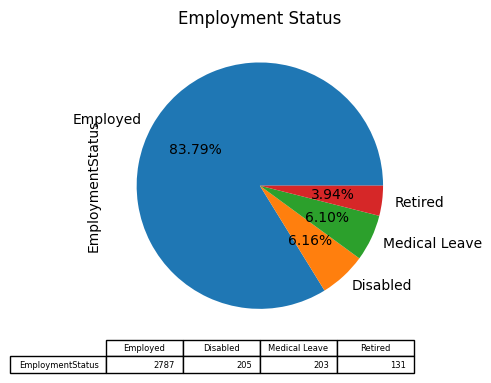

In [11]:
employment_status = df['EmploymentStatus'].value_counts()

employment_status.plot.pie(
    figsize=(4,4),
    title='Employment Status',
    table=True,
    autopct='%1.2f%%'
)

plt.show()

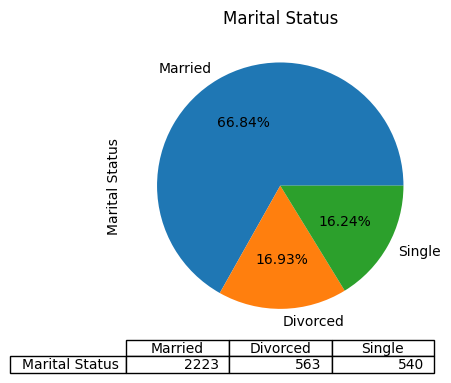

In [12]:
marital_status = df['Marital Status'].value_counts()

marital_status.plot.pie(
    figsize=(4,4),
    title='Marital Status',
    table=True,
    autopct='%1.2f%%'
)

plt.show()

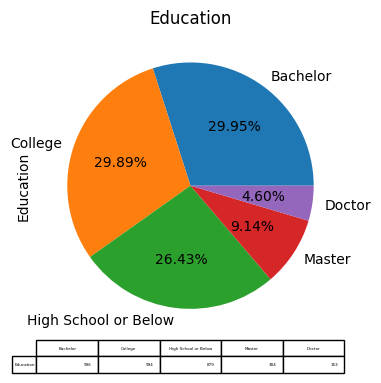

In [13]:
education = df['Education'].value_counts()

education.plot.pie(
    figsize=(4,4),
    title='Education',
    table=True,
    autopct='%1.2f%%'
)

plt.show()

In [14]:
enc = OneHotEncoder(handle_unknown='ignore')

X_enc = df[['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Marital Status']]
enc.fit(X_enc)

OneHotEncoder(handle_unknown='ignore')

In [15]:
res_enc = enc.transform(X_enc).toarray()
res_enc

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [16]:
df_enc = pd.DataFrame(res_enc).astype(int)
df_enc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0
3322,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
3323,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
3324,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1


In [17]:
df['Education'] = df['Education'].replace('High School or Below', 1)
df['Education'] = df['Education'].replace('College', 2)
df['Education'] = df['Education'].replace('Bachelor', 2)
df['Education'] = df['Education'].replace('Master', 3)
df['Education'] = df['Education'].replace('Doctor', 4)
df

,level_0,index,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,0,1,Four-Door Car,Basic,Offer1,Employed,Married,2,6.0,62.0,114.514440,44762.0,4943.386117
1,1,3,Four-Door Car,Premium,Offer3,Disabled,Married,1,1.0,116.0,556.800000,17913.0,4550.856045
2,2,4,Two-Door Car,Basic,Offer3,Medical Leave,Married,1,1.0,62.0,355.820799,19030.0,2372.155492
3,3,5,SUV,Basic,Offer2,Employed,Married,2,8.0,107.0,85.063708,94389.0,8649.700578
4,4,7,Four-Door Car,Basic,Offer2,Employed,Married,2,1.0,66.0,144.987956,26477.0,2621.116054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,4476,5659,Two-Door Car,Basic,Offer1,Retired,Divorced,2,8.0,71.0,697.798804,10787.0,4995.171200
3322,4478,5661,Luxury SUV,Basic,Offer3,Employed,Married,2,1.0,187.0,897.600000,43406.0,7457.344801
3323,4479,5663,Four-Door Car,Basic,Offer1,Employed,Married,1,2.0,69.0,446.084760,30595.0,8114.409136
3324,4481,5666,Four-Door Car,Basic,Offer1,Employed,Single,2,1.0,62.0,44.780402,84658.0,2447.053134


In [18]:
df2 = df_enc.join(df[['Education','Number of Policies','Monthly Premium Auto',
                      'Total Claim Amount','Income','Customer Lifetime Value']])
df2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,2,6.0,62.0,114.514440,44762.0,4943.386117
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1.0,116.0,556.800000,17913.0,4550.856045
2,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,1,1.0,62.0,355.820799,19030.0,2372.155492
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,2,8.0,107.0,85.063708,94389.0,8649.700578
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,2,1.0,66.0,144.987956,26477.0,2621.116054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3321,0,0,0,0,0,1,1,0,0,1,...,1,1,0,0,2,8.0,71.0,697.798804,10787.0,4995.171200
3322,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,2,1.0,187.0,897.600000,43406.0,7457.344801
3323,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,1,2.0,69.0,446.084760,30595.0,8114.409136
3324,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,2,1.0,62.0,44.780402,84658.0,2447.053134


In [19]:
X = df2.iloc[:,:-1].to_numpy()
y = df2['Customer Lifetime Value'].to_numpy()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=8)

print('Data Train', len(X_train))
print('Data Test', len(X_test))

Data Train 2328
Data Test 998


In [26]:
svr_model = SVR(C=111111)

regr = make_pipeline(MinMaxScaler(), svr_model)
regr.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR(C=111111))])

In [27]:
y_pred = regr.predict(X_test)

print('RMSE =',mean_squared_error(y_pred,y_test)**.5)
print('MAE =',mean_absolute_error(y_pred,y_test))
print('R2 =',regr.score(X_test, y_test))

RMSE = 1312.5515471693695
MAE = 637.5020097213445
R2 = 0.6363717873122735


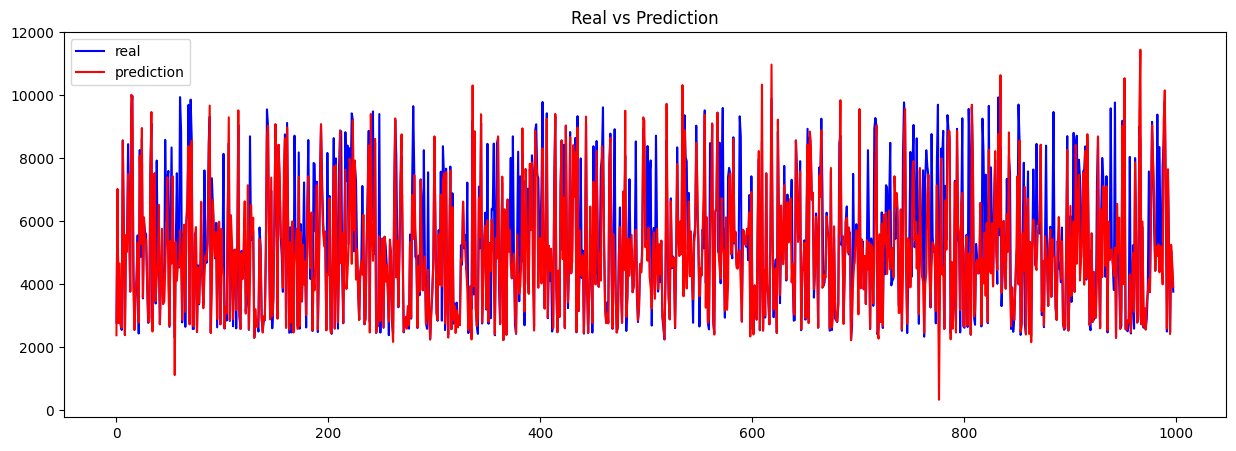

In [23]:
plt.figure(figsize=(15, 5))

plt.plot(y_test, color = 'blue', label = 'real')
plt.plot(y_pred, color = 'red', label = 'prediction')

plt.title('Real vs Prediction')
plt.legend()
plt.show()

In [29]:
save_model = 'model.sav'
pickle.dump(regr, open(save_model, 'wb'))